In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

## Distribution Comparison Tests/Hypothesis Test

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [2]:
df = pd.read_csv('ESSData.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [4]:
df.dropna(subset=['ppltrst', 'pplfair', 'tvtot', 'happy', 'sclmeet', 'sclact'], inplace=True)
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        0
ppltrst      0
pplfair      0
pplhlp      14
happy        0
sclmeet      0
sclact       0
gndr        10
agea       226
partner     16
dtype: int64

In [5]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [6]:
#Year six is 2012, year 7 is 2014
df.year.unique()

array([6, 7], dtype=int64)

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

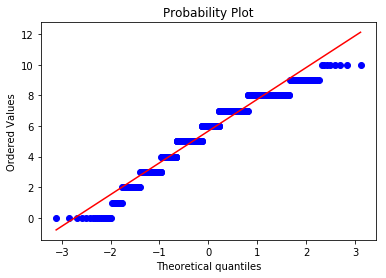

In [7]:
stats.probplot(df.ppltrst[(df.year == 6) & (df.cntry == 'CH')], dist="norm", plot=plt)
plt.show()

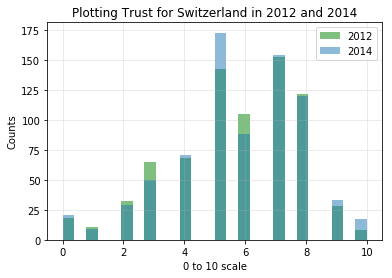

In [8]:
plt.hist(df.ppltrst[(df.year == 6) & (df.cntry == 'CH')], alpha=.5, bins=26, color='g', label='2012') 
plt.hist(df.ppltrst[(df.year == 7) & (df.cntry == 'CH')], alpha=.5, bins=26, label='2014') 
plt.title('Plotting Trust for Switzerland in 2012 and 2014')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('0 to 10 scale')
plt.grid(alpha=.3)
plt.show()

Doesn't look like trust has changed much from 2012 to 2014 in Switzerland. Lets check our Distribution Comparison Tests for all the countrys.

In [9]:
print('T-Tests:')
for x in df.cntry.unique():
    print( x+':', stats.ttest_ind(
        df.ppltrst[(df.year == 6) & (df.cntry == x)],
        df.ppltrst[(df.year == 7) & (df.cntry == x)]))
    
print('\nMann-Whitney U test:')
for x in df.cntry.unique():
    print(x+':', stats.mannwhitneyu(
        df.ppltrst[(df.year == 6) & (df.cntry == x)],
        df.ppltrst[(df.year == 7) & (df.cntry == x)]))
    
print('Counts for each country:')
df.cntry.value_counts()

T-Tests:
CH: Ttest_indResult(statistic=-0.7772099533250093, pvalue=0.43715616892261766)
CZ: Ttest_indResult(statistic=-0.32026403771884376, pvalue=0.7488214950188212)
DE: Ttest_indResult(statistic=-0.3466213170125284, pvalue=0.7317764273785732)
ES: Ttest_indResult(statistic=2.4319380029800253, pvalue=0.015092105392546113)
NO: Ttest_indResult(statistic=0.5275900924621241, pvalue=0.5978647000545039)
SE: Ttest_indResult(statistic=-1.9398892589653978, pvalue=0.05254978625543044)

Mann-Whitney U test:
CH: MannwhitneyuResult(statistic=282672.0, pvalue=0.2629016646444847)
CZ: MannwhitneyuResult(statistic=192968.0, pvalue=0.24169984534235633)
DE: MannwhitneyuResult(statistic=84.0, pvalue=0.3741417871944901)
ES: MannwhitneyuResult(statistic=653128.0, pvalue=0.0025551595841919214)
NO: MannwhitneyuResult(statistic=259371.5, pvalue=0.3297489707019867)
SE: MannwhitneyuResult(statistic=381607.0, pvalue=0.025224296065177624)
Counts for each country:


ES    2365
SE    1795
CH    1518
NO    1450
CZ    1257
DE      27
Name: cntry, dtype: int64

Spain(ES) and Sweden(EN), have the largest diffence between each year, and also show low probabilities that this happned by chance. 

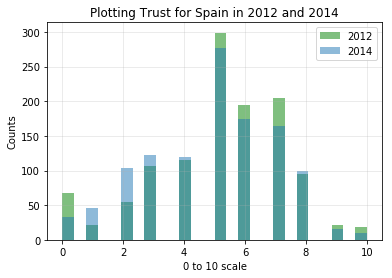

In [10]:
plt.hist(df.ppltrst[(df.year == 6) & (df.cntry == 'ES')], alpha=.5, bins=26, color='g', label='2012') 
plt.hist(df.ppltrst[(df.year == 7) & (df.cntry == 'ES')], alpha=.5, bins=26, label='2014') 
plt.title('Plotting Trust for Spain in 2012 and 2014')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('0 to 10 scale')
plt.grid(alpha=.3)
plt.show()

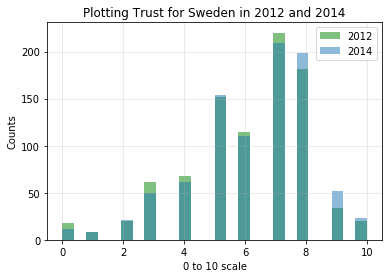

In [11]:
plt.hist(df.ppltrst[(df.year == 6) & (df.cntry == 'SE')], alpha=.5, bins=26, color='g', label='2012') 
plt.hist(df.ppltrst[(df.year == 7) & (df.cntry == 'SE')], alpha=.5, bins=26, label='2014') 
plt.title('Plotting Trust for Sweden in 2012 and 2014')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('0 to 10 scale')
plt.grid(alpha=.3)
plt.show()

## 1 Trust

Trust changed in spain and sweden. Trust in sweden went up, and trust in spain went down. Our statistics test tell us this change is significant.

2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [12]:
print('T-Tests:')
for x in df.cntry.unique():
    print( x+':', stats.ttest_ind(
        df.happy[(df.year == 6) & (df.cntry == x)],
        df.happy[(df.year == 7) & (df.cntry == x)]))
    
print('\nMann-Whitney U test:')
for x in df.cntry.unique():
    print(x+':', stats.mannwhitneyu(
        df.happy[(df.year == 6) & (df.cntry == x)],
        df.happy[(df.year == 7) & (df.cntry == x)]))
    
print('\nCounts for each country:', df.cntry.value_counts())

T-Tests:
CH: Ttest_indResult(statistic=-0.5934020342298979, pvalue=0.5530006465946266)
CZ: Ttest_indResult(statistic=-1.4055023024438296, pvalue=0.160119465164377)
DE: Ttest_indResult(statistic=-0.966317541228559, pvalue=0.3431409128727073)
ES: Ttest_indResult(statistic=1.614808616020929, pvalue=0.10648565241069587)
NO: Ttest_indResult(statistic=4.240692686305424, pvalue=2.369491209908194e-05)
SE: Ttest_indResult(statistic=-0.4214090613317877, pvalue=0.6735069160455964)

Mann-Whitney U test:
CH: MannwhitneyuResult(statistic=282186.5, pvalue=0.24006889533256753)
CZ: MannwhitneyuResult(statistic=189710.0, pvalue=0.11168730053289633)
DE: MannwhitneyuResult(statistic=73.5, pvalue=0.19313536018324134)
ES: MannwhitneyuResult(statistic=668362.0, pvalue=0.029927183451465153)
NO: MannwhitneyuResult(statistic=229129.5, pvalue=6.590324681023957e-06)
SE: MannwhitneyuResult(statistic=401487.0, pvalue=0.4528066845040522)

Counts for each country: ES    2365
SE    1795
CH    1518
NO    1450
CZ    125

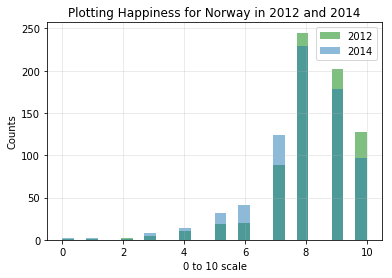

In [13]:
plt.hist(df.happy[(df.year == 6) & (df.cntry == 'NO')], alpha=.5, bins=26, color='g', label='2012') 
plt.hist(df.happy[(df.year == 7) & (df.cntry == 'NO')], alpha=.5, bins=26, label='2014') 
plt.title('Plotting Happiness for Norway in 2012 and 2014')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('0 to 10 scale')
plt.grid(alpha=.3)
plt.show()

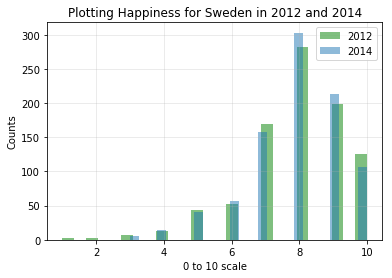

8.0     282
9.0     198
7.0     170
10.0    125
6.0      53
5.0      44
4.0      13
3.0       7
2.0       3
1.0       2
Name: happy, dtype: int64
8.0     303
9.0     213
7.0     157
10.0    107
6.0      57
5.0      41
4.0      14
3.0       6
Name: happy, dtype: int64


In [14]:
plt.hist(df.happy[(df.year == 6) & (df.cntry == 'SE')], alpha=.5, bins=26, color='g', label='2012') 
plt.hist(df.happy[(df.year == 7) & (df.cntry == 'SE')], alpha=.5, bins=26, label='2014') 
plt.title('Plotting Happiness for Sweden in 2012 and 2014')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('0 to 10 scale')
plt.grid(alpha=.3)
plt.show()

print(df.happy[(df.year == 6) & (df.cntry == 'SE')].value_counts())
print(df.happy[(df.year == 7) & (df.cntry == 'SE')].value_counts())

## 2 happiness
Sweden was one of two countries with significant results, and in only one test, the mann whitney. This distribution doens't seem to favor T-test. However, The difference between both years for sweden is very minimal. Happiness didn't change in sweden.

In norway it looks like people got a lot happier! Very interesting and the results are very significant in both test, and the visuals tell the same story.

3. Who reported watching more TV in 2012, men or women?

Looking at how much TV men/women watch. 

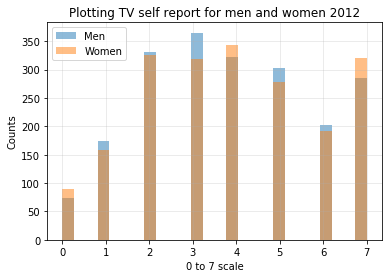

In [36]:
plt.hist(df.tvtot[(df.year == 6) & (df.gndr == 1)], alpha=.5, bins=26, label='Men') 
plt.hist(df.tvtot[(df.year == 6) & (df.gndr == 2)], alpha=.5, bins=26, label='Women') 
plt.title('Plotting TV self report for men and women 2012')
plt.legend(loc='upper left')
plt.ylabel('Counts')
plt.xlabel('0 to 7 scale')
plt.grid(alpha=.3)
plt.show()

In [16]:
print('T-Tests:')
print(stats.ttest_ind(
        df.tvtot[(df.year == 6) & (df.gndr == 1)],
        df.tvtot[(df.year == 6) & (df.gndr == 2)]))

print('\nMann-Whitney U test:')
print(stats.mannwhitneyu(
        df.tvtot[(df.year == 6) & (df.gndr == 1)],
        df.tvtot[(df.year == 6) & (df.gndr == 2)]))

T-Tests:
Ttest_indResult(statistic=-0.656246013087417, pvalue=0.5117018146228687)

Mann-Whitney U test:
MannwhitneyuResult(statistic=2177533.5, pvalue=0.24074218749835474)


## 3 TV men/women 2012

No significant difference in our distributions. Men and women watch the same amount of TV.

4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

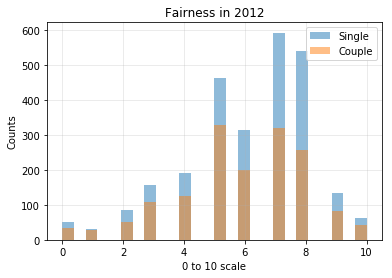

In [17]:
#1 is couple 2 is single.
plt.hist(df.pplfair[(df.year == 6) & (df.partner == 1)], alpha=.5, bins=26, label='Single') 
plt.hist(df.pplfair[(df.year == 6) & (df.partner == 2)], alpha=.5, bins=26, label='Couple') 
plt.title('Fairness in 2012')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('0 to 10 scale')
plt.grid(alpha=.3)
plt.show()

In [18]:
print('T-Tests:')
print(stats.ttest_ind(
        df.tvtot[(df.year == 6) & (df.gndr == 1)],
        df.tvtot[(df.year == 6) & (df.gndr == 2)]))

print('\nMann-Whitney U test:')
print(stats.mannwhitneyu(
        df.tvtot[(df.year == 6) & (df.gndr == 1)],
        df.tvtot[(df.year == 6) & (df.gndr == 2)]))

T-Tests:
Ttest_indResult(statistic=-0.656246013087417, pvalue=0.5117018146228687)

Mann-Whitney U test:
MannwhitneyuResult(statistic=2177533.5, pvalue=0.24074218749835474)


## 4 Fairness singles/couples

The distributions are the same. No difference between singles/couples.

5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [26]:
print('\nCounts for each country:\n', df.cntry.value_counts())


Counts for each country:
 ES    2304
SE    1727
CH    1476
NO    1424
CZ    1228
DE      27
Name: cntry, dtype: int64


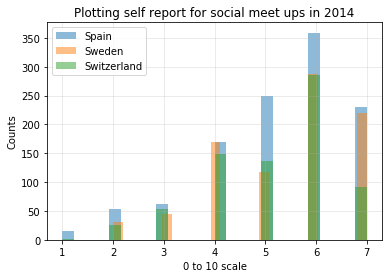

In [35]:
plt.hist(df.sclmeet[(df.year == 7) & (df.cntry == 'ES')], alpha=.5, bins=26, label='Spain') 
plt.hist(df.sclmeet[(df.year == 7) & (df.cntry == 'SE')], alpha=.5, bins=26, label='Sweden') 
plt.hist(df.sclmeet[(df.year == 7) & (df.cntry == 'CH')], alpha=.5, bins=26, label='Switzerland') 
plt.title('Plotting self report for social meet ups in 2014')
plt.legend(loc='upper left')
plt.ylabel('Counts')
plt.xlabel('1 to 7 scale')
plt.grid(alpha=.3)
plt.show()

In [31]:
ftest = stats.f_oneway(
    df.sclmeet[(df.year == 7) & (df.cntry == 'ES')], 
    df.sclmeet[(df.year == 7) & (df.cntry == 'SE')], 
    df.sclmeet[(df.year == 7) & (df.cntry == 'CH')])

krusk = stats.kruskal(
    df.sclmeet[(df.year == 7) & (df.cntry == 'ES')], 
    df.sclmeet[(df.year == 7) & (df.cntry == 'SE')], 
    df.sclmeet[(df.year == 7) & (df.cntry == 'CH')])

print(ftest)
print(krusk)

F_onewayResult(statistic=7.483599123067613, pvalue=0.0005737679843822478)
KruskalResult(statistic=19.82270686609307, pvalue=4.960824872869454e-05)


## 5 Social Meet ups 
This test confirms that one or more countries are different then the average distribution of the three. Looking at the graph spain has odd results for a rating of 5, and switzerland has odd results for a rating of 7. We can run more tests on these distrubtions to confirm, but the visualizations are pretty clear. Sweden looks very similar to the assumed average, the other two are different then the assumed average distribution.


6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [25]:
#Drop rows where age was missing
df.dropna(subset=['agea'], inplace=True)

# create age groups
df['Teen'] = np.where((df.agea < 20), 1, 0)
df['Adult'] = np.where(((df.agea < 45) & (df.agea >= 20)), 1, 0)
df['Middle_aged'] = np.where(((df.agea < 65) & (df.agea >= 45)), 1, 0)
df['Old_aged'] = np.where((df.agea >= 65), 1, 0)

print('people count:', df.shape[0], '\nage group counts:')
df[['Teen', 'Adult', 'Middle_aged', 'Old_aged']].sum()

people count: 8186 
age group counts:


Teen            548
Adult          3164
Middle_aged    2864
Old_aged       1610
dtype: int64

In [37]:
print(stats.f_oneway(
    df.sclact[(df.year == 7) & (df.cntry == 'ES') & (df.Adult == 1)], 
    df.sclact[(df.year == 7) & (df.cntry == 'SE') & (df.Adult == 1)], 
    df.sclact[(df.year == 7) & (df.cntry == 'CH') & (df.Adult == 1)]))
    
print(stats.kruskal(
    df.sclact[(df.year == 7) & (df.cntry == 'ES') & (df.Adult == 1)], 
    df.sclact[(df.year == 7) & (df.cntry == 'SE') & (df.Adult == 1)], 
    df.sclact[(df.year == 7) & (df.cntry == 'CH') & (df.Adult == 1)]))

F_onewayResult(statistic=5.403785689116383, pvalue=0.004628497057934023)
KruskalResult(statistic=10.413021528193111, pvalue=0.005480764041570381)


There is a difference between one of the groups and the average distrubtion of the three, lets take a look at the histogram, and then we will run more test.

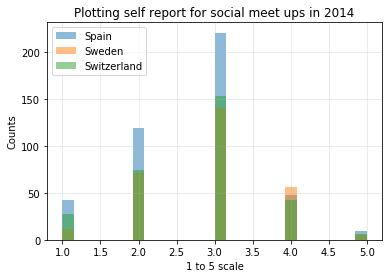

In [39]:
plt.hist(df.sclact[(df.year == 7) & (df.cntry == 'ES') & (df.Adult == 1)], alpha=.5, bins=26, label='Spain') 
plt.hist(df.sclact[(df.year == 7) & (df.cntry == 'SE') & (df.Adult == 1)], alpha=.5, bins=26, label='Sweden') 
plt.hist(df.sclact[(df.year == 7) & (df.cntry == 'CH') & (df.Adult == 1)], alpha=.5, bins=26, label='Switzerland') 
plt.title('Plotting self report for social meet ups in 2014')
plt.legend(loc='upper left')
plt.ylabel('Counts')
plt.xlabel('1 to 5 scale')
plt.grid(alpha=.3)
plt.show()

Spain looks the most different here, very few counts for ratings 4/5 despite having a higher overal count. Lets compare switzerland and sweden to see if they are similar.

In [44]:
print(stats.mannwhitneyu(
    df.sclact[(df.year == 7) & (df.cntry == 'CH') & (df.Adult == 1)],
    df.sclact[(df.year == 7) & (df.cntry == 'SE') & (df.Adult == 1)]
    ))
print(stats.ttest_ind(
    df.sclact[(df.year == 7) & (df.cntry == 'CH') & (df.Adult == 1)],
    df.sclact[(df.year == 7) & (df.cntry == 'SE') & (df.Adult == 1)]))

MannwhitneyuResult(statistic=39699.5, pvalue=0.028972081502178254)
Ttest_indResult(statistic=-2.062407075200466, pvalue=0.03960842913089293)


Looks like there are differences between switzerland and sweden as well. Lets go back and double check spain vs sweden

In [45]:
print(stats.mannwhitneyu(
    df.sclact[(df.year == 7) & (df.cntry == 'ES') & (df.Adult == 1)],
    df.sclact[(df.year == 7) & (df.cntry == 'SE') & (df.Adult == 1)]
    ))
print(stats.ttest_ind(
    df.sclact[(df.year == 7) & (df.cntry == 'ES') & (df.Adult == 1)],
    df.sclact[(df.year == 7) & (df.cntry == 'SE') & (df.Adult == 1)]))

MannwhitneyuResult(statistic=54472.5, pvalue=0.0006149023311358213)
Ttest_indResult(statistic=-3.31107104892102, pvalue=0.0009755582483945176)


Much lower pvalues for this comparison, which means more significant differences. Also, larger difference acording to t-test statistic.